In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import sigkernel as ksig

# Linear kernel functions breakdown

In [2]:
seq_len = 5
X = np.concatenate([np.arange(seq_len)[np.newaxis,...,np.newaxis], 2*np.arange(seq_len)[np.newaxis,...,np.newaxis]], axis=0)
Y = np.concatenate([np.zeros((1,seq_len,1))-1, np.ones((1,seq_len,1))], axis=0)
print(X.shape, Y.shape, X.reshape((-1, X.shape[-1])).shape, Y.reshape((-1, Y.shape[-1])).shape)
print(X.squeeze())
print(Y.squeeze())
# M_XY = ksig.utils.matrix_mult(X.reshape((-1, X.shape[-1])), Y.reshape((-1, Y.shape[-1])), transpose_Y=True).reshape((X.shape[0], X.shape[1], Y.shape[0], Y.shape[1]))
# print(M_XY)
# M_YX = ksig.utils.matrix_mult(Y.reshape((-1, Y.shape[-1])), X.reshape((-1, X.shape[-1])), transpose_Y=True).reshape((Y.shape[0], Y.shape[1], X.shape[0], X.shape[1]))
# print(M_YX)
M_XX = ksig.utils.matrix_mult(X.reshape((-1, X.shape[-1])), X.reshape((-1, X.shape[-1])), transpose_Y=True).reshape((X.shape[0], X.shape[1], X.shape[0], X.shape[1]))
print(M_XX)
# M_YY = ksig.utils.matrix_mult(Y.reshape((-1, Y.shape[-1])), Y.reshape((-1, Y.shape[-1])), transpose_Y=True).reshape((Y.shape[0], Y.shape[1], Y.shape[0], Y.shape[1]))
# print(M_YY)

(2, 5, 1) (2, 5, 1) (10, 1) (10, 1)
[[0 1 2 3 4]
 [0 2 4 6 8]]
[[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]
[[[[ 0  0  0  0  0]
   [ 0  0  0  0  0]]

  [[ 0  1  2  3  4]
   [ 0  2  4  6  8]]

  [[ 0  2  4  6  8]
   [ 0  4  8 12 16]]

  [[ 0  3  6  9 12]
   [ 0  6 12 18 24]]

  [[ 0  4  8 12 16]
   [ 0  8 16 24 32]]]


 [[[ 0  0  0  0  0]
   [ 0  0  0  0  0]]

  [[ 0  2  4  6  8]
   [ 0  4  8 12 16]]

  [[ 0  4  8 12 16]
   [ 0  8 16 24 32]]

  [[ 0  6 12 18 24]
   [ 0 12 24 36 48]]

  [[ 0  8 16 24 32]
   [ 0 16 32 48 64]]]]


In [3]:
kernel = ksig.static.kernels.LinearKernel()
result1 = kernel(X.reshape((-1, X.shape[-1])), Y.reshape((-1, Y.shape[-1]))).reshape((X.shape[0], X.shape[1], Y.shape[0], Y.shape[1]))
result2 = kernel(Y.reshape((-1, Y.shape[-1])), X.reshape((-1, X.shape[-1]))).reshape((Y.shape[0], Y.shape[1], X.shape[0], X.shape[1]))
print(result1.shape)
print(result1)
print(result2)

(2, 5, 2, 5)
[[[[-0. -0. -0. -0. -0.]
   [ 0.  0.  0.  0.  0.]]

  [[-1. -1. -1. -1. -1.]
   [ 1.  1.  1.  1.  1.]]

  [[-2. -2. -2. -2. -2.]
   [ 2.  2.  2.  2.  2.]]

  [[-3. -3. -3. -3. -3.]
   [ 3.  3.  3.  3.  3.]]

  [[-4. -4. -4. -4. -4.]
   [ 4.  4.  4.  4.  4.]]]


 [[[-0. -0. -0. -0. -0.]
   [ 0.  0.  0.  0.  0.]]

  [[-2. -2. -2. -2. -2.]
   [ 2.  2.  2.  2.  2.]]

  [[-4. -4. -4. -4. -4.]
   [ 4.  4.  4.  4.  4.]]

  [[-6. -6. -6. -6. -6.]
   [ 6.  6.  6.  6.  6.]]

  [[-8. -8. -8. -8. -8.]
   [ 8.  8.  8.  8.  8.]]]]
[[[[-0. -1. -2. -3. -4.]
   [-0. -2. -4. -6. -8.]]

  [[-0. -1. -2. -3. -4.]
   [-0. -2. -4. -6. -8.]]

  [[-0. -1. -2. -3. -4.]
   [-0. -2. -4. -6. -8.]]

  [[-0. -1. -2. -3. -4.]
   [-0. -2. -4. -6. -8.]]

  [[-0. -1. -2. -3. -4.]
   [-0. -2. -4. -6. -8.]]]


 [[[ 0.  1.  2.  3.  4.]
   [ 0.  2.  4.  6.  8.]]

  [[ 0.  1.  2.  3.  4.]
   [ 0.  2.  4.  6.  8.]]

  [[ 0.  1.  2.  3.  4.]
   [ 0.  2.  4.  6.  8.]]

  [[ 0.  1.  2.  3.  4.]
   [ 0.  2.  4.  6.  

In [4]:
M_XX

array([[[[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  1,  2,  3,  4],
         [ 0,  2,  4,  6,  8]],

        [[ 0,  2,  4,  6,  8],
         [ 0,  4,  8, 12, 16]],

        [[ 0,  3,  6,  9, 12],
         [ 0,  6, 12, 18, 24]],

        [[ 0,  4,  8, 12, 16],
         [ 0,  8, 16, 24, 32]]],


       [[[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]],

        [[ 0,  2,  4,  6,  8],
         [ 0,  4,  8, 12, 16]],

        [[ 0,  4,  8, 12, 16],
         [ 0,  8, 16, 24, 32]],

        [[ 0,  6, 12, 18, 24],
         [ 0, 12, 24, 36, 48]],

        [[ 0,  8, 16, 24, 32],
         [ 0, 16, 32, 48, 64]]]], dtype=int32)

# Diff function

In [5]:
cp.diff(cp.diff(M_XX, axis=1), axis=-1)

array([[[[1, 1, 1, 1],
         [2, 2, 2, 2]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2]]],


       [[[2, 2, 2, 2],
         [4, 4, 4, 4]],

        [[2, 2, 2, 2],
         [4, 4, 4, 4]],

        [[2, 2, 2, 2],
         [4, 4, 4, 4]],

        [[2, 2, 2, 2],
         [4, 4, 4, 4]]]], dtype=int32)

In [6]:
n_levels = 5
static_kernel = ksig.static.kernels.LinearKernel()
sig_kernel = ksig.kernels.SignatureKernel(n_levels, static_kernel=static_kernel, difference=False)

In [7]:
n_samples = 3
sample_len = 10
dt = 1 / 252
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len)
Y = ksig.tests.gen_GBM_path(0.1, 0.6, dt, n_samples, sample_len)
X.shape, Y.shape

((3, 10, 1), (3, 10, 1))

In [8]:
sig_kernel(X, Y)

array([[145712.19746647, 178771.40454248, 114262.5250862 ],
       [134518.76291995, 164963.71542871, 105545.99537643],
       [146792.29112953, 180104.16400952, 115103.28435911]])

In [9]:
sig_kernel(Y, X)

array([[145712.19746647, 134518.76291995, 146792.29112953],
       [178771.40454248, 164963.71542871, 180104.16400952],
       [114262.5250862 , 105545.99537643, 115103.28435911]])

In [10]:
sig_kernel(X, X)

array([[132243.63706094, 122112.29528871, 133221.09697798],
       [122112.29528871, 112778.61152517, 123012.68187486],
       [133221.09697798, 123012.68187486, 134206.00472499]])

In [11]:
sig_kernel(X, Y+10)

array([[1.14430566e+10, 1.17036821e+10, 1.11591493e+10],
       [1.04563394e+10, 1.06944362e+10, 1.01969723e+10],
       [1.15389257e+10, 1.18017404e+10, 1.12526337e+10]])

# Signature kernel function

In [12]:
import numpy as np
import cupy as cp

from numbers import Number, Integral
from typing import Optional, Union, List, Tuple

ArrayOnCPU = np.ndarray
ArrayOnGPU = cp.ndarray
ArrayOnCPUOrGPU = Union[cp.ndarray, np.ndarray]

In [13]:
from abc import ABCMeta, abstractmethod
from sklearn.base import BaseEstimator
from ksig import utils

class Kernel(BaseEstimator, metaclass=ABCMeta):
    """Base class for Kernels.

    Warning: This class should not be used directly.
    Use derived classes instead.
    """

    def fit(self, X : ArrayOnCPUOrGPU, y : Optional[ArrayOnCPUOrGPU] = None):
        return self

    @abstractmethod
    def _K(self, X : ArrayOnGPU, Y : Optional[ArrayOnGPU] = None) -> ArrayOnGPU:
        pass

    @abstractmethod
    def _Kdiag(self, X : ArrayOnGPU) -> ArrayOnGPU:
        pass

    def __call__(self, X : ArrayOnCPUOrGPU, Y : Optional[ArrayOnCPUOrGPU] = None, diag : bool = False, return_on_gpu : bool = False) -> ArrayOnCPUOrGPU:
        X = cp.asarray(X)
        Y = cp.asarray(Y) if Y is not None else None
        if diag:
            K = self._Kdiag(X)
        else:
            K =  self._K(X, Y)
        if not return_on_gpu:
            K = cp.asnumpy(K)
        return K

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

class LinearKernel(Kernel):
    """Class for linear (static) kernel."""

    def __init__(self, sigma : float = 1.0) -> None:
        self.sigma = utils.check_positive_value(sigma, 'sigma')

    def _K(self, X : ArrayOnGPU, Y : Optional[ArrayOnGPU] = None) -> ArrayOnGPU:
        return self.sigma**2 * utils.matrix_mult(X, Y, transpose_Y=True)

    def _Kdiag(self, X : ArrayOnGPU) -> ArrayOnGPU:
        return self.sigma**2 * utils.squared_norm(X, axis=-1)

In [14]:
def multi_cumsum(M : ArrayOnGPU, exclusive : bool = False, axis : int = -1) -> ArrayOnGPU:
    """Computes the exclusive cumulative sum along a given set of axes.

    Args:
        K (cp.ndarray): A matrix over which to compute the cumulative sum
        axis (int or iterable, optional): An axis or a collection of them. Defaults to -1 (the last axis).
    """

    ndim = M.ndim
    axis = [axis] if cp.isscalar(axis) else axis
    axis = [ndim+ax if ax < 0 else ax for ax in axis]

    # create slice for exclusive cumsum (slice off last element along given axis then pre-pad with zeros)
    if exclusive:
        slices = tuple(slice(-1) if ax in axis else slice(None) for ax in range(ndim))
        M = M[slices]

    # compute actual cumsums
    for ax in axis:
        M = cp.cumsum(M, axis=ax)

    # pre-pad with zeros along the given axis if exclusive cumsum
    if exclusive:
        pads = tuple((1, 0) if ax in axis else (0, 0) for ax in range(ndim))
        M = cp.pad(M, pads)

    return M

In [15]:
def signature_kern_higher_order(M : ArrayOnGPU, n_levels : int, order : int, difference : bool = True, return_levels : bool = False) -> ArrayOnGPU:
    """
    Computes the signature kernel matrix with higher-order embedding into the tensor algebra.
    """

    if difference:
        M = cp.diff(cp.diff(M, axis=1), axis=-1)

    if M.ndim == 4:
        n_X, n_Y = M.shape[0], M.shape[2]
        K = cp.ones((n_X, n_Y), dtype=M.dtype)
    else:
        n_X = M.shape[0]
        K = cp.ones((n_X,), dtype=M.dtype)

    if return_levels:
        K = [K, cp.sum(M, axis=(1, -1))]
    else:
        K += cp.sum(M, axis=(1, -1))

    R = cp.copy(M)[None, None, ...]
    for i in range(1, n_levels):
        d = min(i+1, order)
        R_next = cp.empty((d, d) + M.shape, dtype=M.dtype)
        R_next[0, 0] = M * multi_cumsum(cp.sum(R, axis=(0, 1)), exclusive=True, axis=(1, -1))
        for r in range(1, d):
            R_next[0, r] = 1./(r+1) * M * multi_cumsum(cp.sum(R[:, r-1], axis=0), exclusive=True, axis=1)
            R_next[r, 0] = 1./(r+1) * M * multi_cumsum(cp.sum(R[r-1, :], axis=0), exclusive=True, axis=-1)
            for s in range(1, d):
                R_next[r, s] = 1./((r+1)*(s+1)) * M * R[r-1, s-1]
        R = R_next
        if return_levels:
            K.append(cp.sum(R, axis=(0, 1, 3, -1)))
        else:
            K += cp.sum(R, axis=(0, 1, 3, -1))

    return cp.stack(K, axis=0) if return_levels else K

# Order parameter

In [16]:
# simulate geometric Brownian motion paths
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=0.1, n_paths=3, seq_len=60)
Y = ksig.tests.gen_GBM_path(0.1, 0.3, 0.1, 3, 60)

In [17]:
static_kernel = LinearKernel()

# M = static_kernel(X, diag=True, return_on_gpu=True)

M_X = static_kernel(X.reshape((-1, X.shape[-1])), return_on_gpu=True).reshape((X.shape[0], X.shape[1], X.shape[0], X.shape[1]))
M_Y = static_kernel(Y.reshape((-1, Y.shape[-1])), return_on_gpu=True).reshape((Y.shape[0], Y.shape[1], Y.shape[0], Y.shape[1]))
M_XY = static_kernel(X.reshape((-1, X.shape[-1])), Y.reshape((-1, Y.shape[-1])), return_on_gpu=True).reshape((X.shape[0], X.shape[1], Y.shape[0], Y.shape[1]))
M_YX = static_kernel(Y.reshape((-1, Y.shape[-1])), X.reshape((-1, X.shape[-1])), return_on_gpu=True).reshape((Y.shape[0], Y.shape[1], X.shape[0], X.shape[1]))
M_X.shape, M_Y.shape, M_XY.shape, M_YX.shape

((3, 60, 3, 60), (3, 60, 3, 60), (3, 60, 3, 60), (3, 60, 3, 60))

In [18]:
# calculate the signature kernel using different order values
n_levels = 5
order = 5

sig_orders = []
for i in range(1, n_levels+1):
    sig_XY = signature_kern_higher_order(M_XY, n_levels, i, return_levels=True, difference=True)
    sig_orders.append(sig_XY)

In [19]:
# check which levels are the same for each order value
for i in range(n_levels-1):
    pair = np.array([0, 1]) + i
    if not np.allclose(sig_orders[pair[0]], sig_orders[pair[1]]):
        print(f'Order: {pair[0]+1} vs {pair[1]+1}')
        for i in range(n_levels+1):
            print(f'level {i}', np.allclose(sig_orders[pair[0]][i], sig_orders[pair[1]][i]))

Order: 1 vs 2
level 0 True
level 1 True
level 2 False
level 3 False
level 4 False
level 5 False
Order: 2 vs 3
level 0 True
level 1 True
level 2 True
level 3 False
level 4 False
level 5 False
Order: 3 vs 4
level 0 True
level 1 True
level 2 True
level 3 True
level 4 False
level 5 False
Order: 4 vs 5
level 0 True
level 1 True
level 2 True
level 3 True
level 4 True
level 5 False


# Tensor normalisation for characteristic signature kernel

In [20]:
# two functions used to compute the normalisation constant
def psi(x, a=1, c=4):
    x = c+c**(1+a)*(c**-a - x**-a)/a if x>4 else x
    return x

def norm_func(lamda, norms, norm_sum, a=1, c=4):
    m = len(norms)
    lamda = np.ones(m) * lamda
    powers = np.arange(m) * 2
    return np.sum(norms * np.power(lamda, powers)) - psi(norm_sum, a, c)

In [22]:
n_levels = 5
order = 5
difference = True
sig_levels_XY = signature_kern_higher_order(M_XY, n_levels, order, return_levels=True, difference=difference)
sig_XY = signature_kern_higher_order(M_XY, n_levels, order, return_levels=False, difference=difference)
sig_levels_YX = signature_kern_higher_order(M_YX, n_levels, order, return_levels=True, difference=difference)
sig_YX = signature_kern_higher_order(M_YX, n_levels, order, return_levels=False, difference=difference)
sig_levels_X = signature_kern_higher_order(M_X, n_levels, order, return_levels=True, difference=difference)
sig_X = signature_kern_higher_order(M_X, n_levels, order, return_levels=False, difference=difference)
sig_levels_Y = signature_kern_higher_order(M_Y, n_levels, order, return_levels=True, difference=difference)
sig_Y = signature_kern_higher_order(M_Y, n_levels, order, return_levels=False, difference=difference)
sig_XY.shape, sig_YX.shape, sig_X.shape, sig_Y.shape, sig_levels_XY.shape, sig_levels_YX.shape, sig_levels_X.shape, sig_levels_Y.shape

((3, 3), (3, 3), (3, 3), (3, 3), (6, 3, 3), (6, 3, 3), (6, 3, 3), (6, 3, 3))

In [35]:
# check that the signature kernel is symmetric
np.allclose(sig_XY, sig_YX.T), np.allclose(sig_X, sig_X.T), np.allclose(sig_Y, sig_Y.T)

(array(True), array(True), array(True))

In [24]:
# gets the squared norm of each level of the signature tensor
ksig.utils.matrix_diag(sig_levels_X) # (normsq of level 0 for all paths, normsq of level 1 for all paths, ...)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.28482214e+00, 2.74430363e-01, 2.42848225e+00],
       [1.30510306e+00, 1.88280060e-02, 1.47438151e+00],
       [3.31325373e-01, 5.74108503e-04, 3.97834369e-01],
       [4.73137218e-02, 9.84705029e-06, 6.03833565e-02],
       [4.32413757e-03, 1.08093183e-07, 5.86559638e-03]])

In [25]:
M = M_X
C = 4.0

M = cp.diff(cp.diff(M, axis=1), axis=-1)

if M.ndim == 4:
    n_X, n_Y = M.shape[0], M.shape[2]
    K = cp.ones((n_X, n_Y), dtype=M.dtype)
else:
    n_X = M.shape[0]
    K = cp.ones((n_X,), dtype=M.dtype)

K = [K, cp.sum(M, axis=(1, -1))]

R = cp.copy(M)[None, None, ...]
for i in range(1, n_levels):
    d = min(i+1, order)
    R_next = cp.empty((d, d) + M.shape, dtype=M.dtype)
    R_next[0, 0] = M * multi_cumsum(cp.sum(R, axis=(0, 1)), exclusive=True, axis=(1, -1))
    for r in range(1, d):
        R_next[0, r] = 1./(r+1) * M * multi_cumsum(cp.sum(R[:, r-1], axis=0), exclusive=True, axis=1)
        R_next[r, 0] = 1./(r+1) * M * multi_cumsum(cp.sum(R[r-1, :], axis=0), exclusive=True, axis=-1)
        for s in range(1, d):
            R_next[r, s] = 1./((r+1)*(s+1)) * M * R[r-1, s-1]
    R = R_next
    K.append(cp.sum(R, axis=(0, 1, 3, -1)))

K = cp.asarray(K)
# get diagonal of signature kernel matrix and transpose to get tensor norm^2 for each level of each path in X
normsq_levels = ksig.utils.matrix_diag(K).T
# get the norm^2 of the signature by summing the norm^2 of each level
normsq = np.sum(normsq_levels, axis=1)
# check if norm^2 is greater than C for each signature to see if normalisation is required
norm_condition = normsq > C

In [26]:
normsq, norm_condition

(array([4.97288843, 1.29384243, 5.36694708]), array([ True, False,  True]))

In [27]:
# solve for the normalisation constant for each path
from scipy.optimize import brentq
lamdas = np.ones(n_samples)
for i in range(n_samples):
    if norm_condition[i]:
        lamdas[i] = brentq(norm_func, 0, 1, args=(cp.asnumpy(normsq_levels[i]), cp.asnumpy(normsq[i]).sum(), 1, C))
lamdas

array([0.98405751, 1.        , 0.97360186])

In [41]:
# create the normalisation constant raised to the power for each level
m_lamdas = lamdas[:,np.newaxis] @ lamdas[np.newaxis,:]
m_lamdas = np.power(m_lamdas, np.arange(n_levels+1)[:, np.newaxis, np.newaxis])
m_lamdas, m_lamdas.shape, K.shape

(array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.96836918, 0.98405751, 0.95808022],
         [0.98405751, 1.        , 0.97360186],
         [0.95808022, 0.97360186, 0.94790058]],
 
        [[0.93773887, 0.96836918, 0.91791771],
         [0.96836918, 1.        , 0.94790058],
         [0.91791771, 0.94790058, 0.89851551]],
 
        [[0.90807742, 0.95293096, 0.8794388 ],
         [0.95293096, 1.        , 0.92287777],
         [0.8794388 , 0.92287777, 0.85170337]],
 
        [[0.87935419, 0.93773887, 0.84257292],
         [0.93773887, 1.        , 0.89851551],
         [0.84257292, 0.89851551, 0.80733012]],
 
        [[0.8515395 , 0.92278898, 0.80725245],
         [0.92278898, 1.        , 0.87479637],
         [0.80725245, 0.87479637, 0.76526869]]]),
 (6, 3, 3),
 (6, 3, 3))

In [24]:
# test how to extract digonal of 2D matrix from tensor of 2D matrices
test = cp.asarray(np.random.randint(0, 10, size=(5, 3, 3)))
print(test)
ksig.utils.matrix_diag(test).T

[[[0 9 9]
  [8 0 1]
  [7 9 8]]

 [[0 5 4]
  [6 9 8]
  [7 2 7]]

 [[8 6 4]
  [3 6 8]
  [0 9 2]]

 [[0 0 7]
  [5 1 1]
  [6 0 7]]

 [[8 1 8]
  [5 5 5]
  [0 9 5]]]


array([[0, 0, 8, 0, 8],
       [0, 9, 6, 1, 5],
       [8, 7, 2, 7, 5]])

# Permutations of kernel matrix

In [46]:
import numpy as np
from itertools import product
n = 4
m = 4

In [47]:
# permutation based on sum of sizes
perm_inds = np.random.permutation(m+n)
X_inds = perm_inds[:n]
Y_inds = perm_inds[n:]

print(perm_inds)
print(X_inds)
print(Y_inds)

[1 3 2 0 4 5 7 6]
[1 3 2 0]
[4 5 7 6]


In [48]:
# create the kernel matrices
K_XX = np.arange(n*n).reshape((n,n))
K_YY = np.arange(m*m).reshape((m,m)) + n*n
K_XY = np.arange(n*m).reshape((n,m)) + n*n + m*m

print(K_XX)
print(K_YY)
print(K_XY)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[[32 33 34 35]
 [36 37 38 39]
 [40 41 42 43]
 [44 45 46 47]]


In [49]:
# function to get the cartesian product of two array of indices
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [50]:
# permutation based on number to draw from each set then permute within each set
perm_inds_X = np.random.permutation(n)
perm_inds_Y = np.random.permutation(m)
p = np.random.randint(0, n+1)
X_inds_sample_1 = perm_inds_X[:p]
Y_inds_sample_1 = perm_inds_Y[:n-p]
X_inds_sample_2 = perm_inds_X[p:]
Y_inds_sample_2 = perm_inds_Y[n-p:]
X_inds_sample_1, Y_inds_sample_1, X_inds_sample_2, Y_inds_sample_2

(array([3, 2, 0]), array([1]), array([1]), array([0, 2, 3]))

In [51]:
cartesian_product(X_inds_sample_1, X_inds_sample_1)
# ok to leave diagonals of the kernel matrix in as they will be zeroed out

array([[3, 3],
       [3, 2],
       [3, 0],
       [2, 3],
       [2, 2],
       [2, 0],
       [0, 3],
       [0, 2],
       [0, 0]])

In [52]:
print(K_XX)
K_XX[np.ix_(X_inds_sample_1, X_inds_sample_1)]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[15, 14, 12],
       [11, 10,  8],
       [ 3,  2,  0]])

In [53]:
cartesian_product(Y_inds_sample_1, Y_inds_sample_1)

array([[1, 1]])

In [54]:
print(K_YY)
K_YY[np.ix_(Y_inds_sample_1, Y_inds_sample_1)]

[[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([[21]])

In [55]:
cartesian_product(X_inds_sample_1, Y_inds_sample_1)

array([[3, 1],
       [2, 1],
       [0, 1]])

In [56]:
print(K_XY)
K_XY[np.ix_(X_inds_sample_1, Y_inds_sample_1)]

[[32 33 34 35]
 [36 37 38 39]
 [40 41 42 43]
 [44 45 46 47]]


array([[45],
       [41],
       [33]])

In [57]:
cartesian_product(X_inds_sample_1, X_inds_sample_2)

array([[3, 1],
       [2, 1],
       [0, 1]])

In [58]:
cartesian_product(Y_inds_sample_1, Y_inds_sample_2)

array([[1, 0],
       [1, 2],
       [1, 3]])

In [59]:
cartesian_product(X_inds_sample_1, Y_inds_sample_2)

array([[3, 0],
       [3, 2],
       [3, 3],
       [2, 0],
       [2, 2],
       [2, 3],
       [0, 0],
       [0, 2],
       [0, 3]])

In [60]:
cartesian_product(X_inds_sample_2, Y_inds_sample_1)

array([[1, 1]])

## Verify

In [128]:
import sigkernel as ksig
import numpy as np
np.set_printoptions(precision=5, suppress=True)
n_paths = 50
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=0.1, n_paths=n_paths, seq_len=60)
Y = ksig.tests.gen_GBM_path(0.2, 0.4, 0.1, n_paths, 60)
Z = np.concatenate([X, Y], axis=0)
X.shape, Y.shape, Z.shape

((50, 60, 1), (50, 60, 1), (100, 60, 1))

In [129]:
static_kernel = ksig.static.kernels.LinearKernel()

In [130]:
M_X = static_kernel(X.reshape((-1, X.shape[-1])), return_on_gpu=True).reshape((X.shape[0], X.shape[1], X.shape[0], X.shape[1]))
M_Y = static_kernel(Y.reshape((-1, Y.shape[-1])), return_on_gpu=True).reshape((Y.shape[0], Y.shape[1], Y.shape[0], Y.shape[1]))
M_XY = static_kernel(X.reshape((-1, X.shape[-1])), Y.reshape((-1, Y.shape[-1])), return_on_gpu=True).reshape((X.shape[0], X.shape[1], Y.shape[0], Y.shape[1]))
M_X.shape, M_Y.shape, M_XY.shape

((50, 60, 50, 60), (50, 60, 50, 60), (50, 60, 50, 60))

In [131]:
from ksig.algorithms import signature_kern_higher_order
n_levels = 4
order = 4
difference = True
K_XX = signature_kern_higher_order(M_X, n_levels, order, return_levels=False, difference=difference)
K_YY = signature_kern_higher_order(M_Y, n_levels, order, return_levels=False, difference=difference)
K_XY = signature_kern_higher_order(M_XY, n_levels, order, return_levels=False, difference=difference)
np.fill_diagonal(K_XX, 0)
np.fill_diagonal(K_YY, 0)

In [132]:
def get_permuted_kernel_sum(K_XX, K_YY, K_XY, inds_X, inds_Y):
    '''
    Calculate the sum of the permuted gram matrix
    gram_X: np.array of shape (n, n)
    gram_Y: np.array of shape (m, m)
    inds_X: 1D np.array up to size n and containing integers in [0,n]
    inds_Y: 1D np.array up to size m and containing integers in [0,m]
    '''
    if len(inds_X) == 0:
        return np.sum(K_YY)
    elif len(inds_Y) == 0:
        return np.sum(K_XX)
    else:
        return np.sum(K_XX[np.ix_(inds_X, inds_X)]) + np.sum(K_YY[np.ix_(inds_Y, inds_Y)]) + 2 * np.sum(K_XY[np.ix_(inds_X, inds_Y)])

def get_permuted_cross_kernel_sum(K_XX, K_YY, K_XY, inds_X_1, inds_Y_1, inds_X_2, inds_Y_2):
    '''
    Calculate the sum of the permuted cross gram matrix
    '''
    if len(inds_X_1) == 0:
        assert len(inds_Y_2) == 0, 'if inds_X_1 is empty then inds_Y_2 must also be empty'
        return np.sum(K_XY)
    elif len(inds_Y_1) == 0:
        assert len(inds_X_2) == 0, 'if inds_Y_1 is empty then inds_X_2 must also be empty'
        return np.sum(K_XY)
    else:
        return (np.sum(K_XX[np.ix_(inds_X_1, inds_X_2)]) +
                np.sum(K_YY[np.ix_(inds_Y_1, inds_Y_2)]) +
                np.sum(K_XY[np.ix_(inds_X_1, inds_Y_2)]) +
                np.sum(K_XY[np.ix_(inds_X_2, inds_Y_1)]))

In [133]:
# edge case of same samples returned
X_inds_sample_1 = np.arange(n_paths)
Y_inds_sample_1 = np.array([])
X_inds_sample_2 = np.array([])
Y_inds_sample_2 = np.arange(n_paths)
sample_1 = np.arange(n_paths)
sample_2 = np.arange(n_paths) + n_paths
X_inds_sample_1, Y_inds_sample_1, X_inds_sample_2, Y_inds_sample_2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [134]:
p = np.random.permutation(2*n_paths)
sample_1 = p[:n_paths]
X_inds_sample_1 = sample_1[sample_1 < n_paths]
Y_inds_sample_1 = sample_1[sample_1 >= n_paths] - n_paths
sample_2 = p[n_paths:]
X_inds_sample_2 = sample_2[sample_2 < n_paths]
Y_inds_sample_2 = sample_2[sample_2 >= n_paths] - n_paths
X_inds_sample_1, Y_inds_sample_1, X_inds_sample_2, Y_inds_sample_2

(array([27,  2, 41,  1,  4, 36, 32, 45,  3, 18,  5, 11, 26, 49,  7, 22, 13,
        34, 30, 15, 37,  8,  6, 17, 43]),
 array([29, 39,  7, 13, 42, 49, 12, 40, 35, 41, 14, 15, 43,  1, 46, 45, 17,
         0,  3, 32, 28,  2, 47, 34, 21]),
 array([39, 31, 10, 24,  9, 19, 42, 23, 12, 40, 20, 48, 16,  0, 38, 46, 44,
        21, 35, 29, 47, 25, 14, 28, 33]),
 array([11, 26,  5, 36, 44,  4,  8, 18, 22, 19,  6, 23, 25,  9, 10, 33, 38,
        30, 20, 31, 27, 48, 37, 16, 24]))

In [135]:
# compute efficient kernel sums
# from sigkernel.tests import get_permuted_kernel_sum, get_permuted_cross_kernel_sum
perm_K_XX_sum = get_permuted_kernel_sum(K_XX, K_YY, K_XY, X_inds_sample_1, Y_inds_sample_1)
perm_K_YY_sum = get_permuted_kernel_sum(K_XX, K_YY, K_XY, X_inds_sample_2, Y_inds_sample_2)
perm_K_XY_sum = get_permuted_cross_kernel_sum(K_XX, K_YY, K_XY, X_inds_sample_1, Y_inds_sample_1, X_inds_sample_2, Y_inds_sample_2)

# compute quadratic kernel sums
X_ = Z[sample_1]
Y_ = Z[sample_2]
M_X = static_kernel(X_.reshape((-1, X_.shape[-1])), return_on_gpu=True).reshape((X_.shape[0], X_.shape[1], X_.shape[0], X_.shape[1]))
M_Y = static_kernel(Y_.reshape((-1, Y_.shape[-1])), return_on_gpu=True).reshape((Y_.shape[0], Y_.shape[1], Y_.shape[0], Y_.shape[1]))
M_XY = static_kernel(X_.reshape((-1, X_.shape[-1])), Y_.reshape((-1, Y_.shape[-1])), return_on_gpu=True).reshape((X_.shape[0], X_.shape[1], Y_.shape[0], Y_.shape[1]))
K_XX_ = signature_kern_higher_order(M_X, n_levels, order, return_levels=False, difference=difference)
K_YY_ = signature_kern_higher_order(M_Y, n_levels, order, return_levels=False, difference=difference)
K_XY_ = signature_kern_higher_order(M_XY, n_levels, order, return_levels=False, difference=difference)
np.fill_diagonal(K_XX_, 0)
np.fill_diagonal(K_YY_, 0)

# check that the kernel sums are the same
perm_K_XX_sum - K_XX_.sum(), perm_K_YY_sum - K_YY_.sum(), perm_K_XY_sum - K_XY_.sum()

(array(0.), array(0.), array(0.))

In [136]:
K_XX

array([[0.     , 0.85258, 1.34241, ..., 1.49703, 1.50868, 1.13674],
       [0.85258, 0.     , 0.90517, ..., 0.86797, 0.86529, 0.95979],
       [1.34241, 0.90517, 0.     , ..., 1.30281, 1.30964, 1.08569],
       ...,
       [1.49703, 0.86797, 1.30281, ..., 0.     , 1.4482 , 1.12152],
       [1.50868, 0.86529, 1.30964, ..., 1.4482 , 0.     , 1.12416],
       [1.13674, 0.95979, 1.08569, ..., 1.12152, 1.12416, 0.     ]])

In [137]:
K_YY

array([[  0.     ,   4.80522,   3.95164, ...,   4.09616,   0.92369,
          2.14102],
       [  4.80522,   0.     , 547.08783, ..., 608.01984,   0.34707,
         68.32264],
       [  3.95164, 547.08783,   0.     , ..., 354.04379,   0.43211,
         44.70518],
       ...,
       [  4.09616, 608.01984, 354.04379, ...,   0.     ,   0.41642,
         48.38842],
       [  0.92369,   0.34707,   0.43211, ...,   0.41642,   0.     ,
          0.69827],
       [  2.14102,  68.32264,  44.70518, ...,  48.38842,   0.69827,
          0.     ]])

In [138]:
K_XY

array([[1.35663, 8.51495, 6.61311, ..., 6.92856, 0.8853 , 2.942  ],
       [0.90162, 0.20339, 0.3003 , ..., 0.28224, 1.0366 , 0.61827],
       [1.21955, 4.59484, 3.79637, ..., 3.93178, 0.92645, 2.08984],
       ...,
       [1.31528, 7.17453, 5.66559, ..., 5.91739, 0.89737, 2.67077],
       [1.32242, 7.39577, 5.82293, ..., 6.08511, 0.89527, 2.71672],
       [1.08905, 2.11606, 1.90811, ..., 1.94439, 0.96892, 1.4019 ]])

In [142]:
rK_XX = np.round(K_XX, 5)
rK_YY = np.round(K_YY, 5)
rK_XY = np.round(K_XY, 5)
set1 = np.union1d(np.union1d(rK_XX[np.ix_(X_inds_sample_1, X_inds_sample_1)],
                             rK_YY[np.ix_(Y_inds_sample_1, Y_inds_sample_1)]),
                  rK_XY[np.ix_(X_inds_sample_1, Y_inds_sample_1)])
set1

array([   -0.36753,    -0.3665 ,    -0.36602, ...,  5533.05187,
        9176.38822, 19146.14343])

In [143]:
set2 = np.unique(np.round(K_XX_, 5))
set2

array([   -0.36753,    -0.3665 ,    -0.36602, ...,  5533.05187,
        9176.38822, 19146.14343])

In [144]:
np.setdiff1d(set1, set2), np.setdiff1d(set2, set1)

(array([], dtype=float64), array([], dtype=float64))

# GPU Memory Usage

In [7]:
import numpy as np
import cupy as cp

n=int(2e4)
x = cp.array(np.random.randn(n,n))

In [8]:
x = cp.asnumpy(x)
cp._default_memory_pool.free_all_blocks()
y = cp.array(np.random.randn(n,n))
y = y @ y
y = cp.asnumpy(y)
cp._default_memory_pool.free_all_blocks()
z = cp.array(np.random.randn(n,n))
z = z @ z
z = cp.asnumpy(z)
cp._default_memory_pool.free_all_blocks()

# Signature kernel calculation verification

In [1]:
import math
import numpy as np
import sigkernel as ksig

In [2]:
seq_len = 5
x = np.arange(seq_len).reshape((1, seq_len, 1))
x

array([[[0],
        [1],
        [2],
        [3],
        [4]]])

In [3]:
n_levels = 10
static_kernel = ksig.static.kernels.LinearKernel()
kernel = ksig.kernels.SignatureKernel(n_levels=n_levels, order=n_levels, static_kernel=static_kernel, difference=True)

In [4]:
# calculate signature levels
diff = (x[:,-1,:] - x[:,0,:]).squeeze()

x_levels = []
for i in range(n_levels+1):
    x_levels.append(diff**i / math.factorial(i))

x_levels

[1.0,
 4.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 8.533333333333333,
 5.688888888888889,
 3.250793650793651,
 1.6253968253968254,
 0.7223985890652558,
 0.28895943562610227]

In [5]:
np.dot(x_levels, x_levels)

427.551721600428

In [6]:
kernel(x,x)

array([[427.5517216]])

In [7]:
y = np.random.randint(10, size=seq_len).reshape((1, seq_len, 1))
y

array([[[5],
        [5],
        [3],
        [3],
        [9]]])

In [8]:
diff = (y[:,-1,:] - y[:,0,:]).squeeze()

y_levels = []
for i in range(n_levels+1):
    y_levels.append(diff**i / math.factorial(i))

y_levels

[1.0,
 4.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 8.533333333333333,
 5.688888888888889,
 3.250793650793651,
 1.6253968253968254,
 0.7223985890652558,
 0.28895943562610227]

In [9]:
np.dot(y_levels, y_levels)

427.551721600428

In [10]:
kernel(y,y)

array([[427.5517216]])

In [11]:
np.dot(x_levels, y_levels)

427.551721600428

In [12]:
kernel(x,y)

array([[427.5517216]])

## Gaussian kernel

In [1]:
import math
import numpy as np
import sigkernel_cpu as ksig

In [2]:
n_levels = 5
static_kernel = ksig.static.kernels.RBFKernel(lengthscale=1.0)
kernel = ksig.kernels.SignatureKernel(n_levels=n_levels, order=n_levels, static_kernel=static_kernel, difference=True)

In [161]:
seq_len = 4
# x = np.arange(seq_len).reshape((1, seq_len, 1))
# x = np.array([0,5]).reshape((1, seq_len, 1))

x = np.empty((1, seq_len, 1))
z = np.log(10000)**0.5
for i in range(seq_len):
    x[0,i,0] = z*i
x

array([[[0.        ],
        [3.03485426],
        [6.06970852],
        [9.10456278]]])

In [162]:
# calculate signature levels
diff = (x[:,-1,:] - x[:,0,:]).squeeze()

x_levels = []
for i in range(n_levels+1):
    x_levels.append(diff**i / math.factorial(i))

x_levels

[1.0, 9.104562776310878, 41.44653167389282]

In [163]:
sqdist = ksig.utils.squared_euclid_dist(x, x)
print(sqdist.shape)
sqdist

(1, 4, 4)


array([[[ 0.        ,  9.21034037, 36.84136149, 82.89306335],
        [ 9.21034037,  0.        ,  9.21034037, 36.84136149],
        [36.84136149,  9.21034037,  0.        ,  9.21034037],
        [82.89306335, 36.84136149,  9.21034037,  0.        ]]])

In [164]:
lengthscale = 1.0
rbf = np.exp(-sqdist / lengthscale**2)
print(rbf.shape)
rbf

(1, 4, 4)


array([[[1.e+00, 1.e-04, 1.e-16, 1.e-36],
        [1.e-04, 1.e+00, 1.e-04, 1.e-16],
        [1.e-16, 1.e-04, 1.e+00, 1.e-04],
        [1.e-36, 1.e-16, 1.e-04, 1.e+00]]])

In [165]:
# Algorithm 3 of  "Kernels for sequentially ordered data"
K = np.empty((seq_len-1, seq_len-1))
for i in range(seq_len-1):
    for j in range(seq_len-1):
        K[i,j] = (rbf[0,i+1,j+1] + rbf[0,i,j] - rbf[0,i+1,j] - rbf[0,i,j+1])
K = np.array(K)
K

array([[ 1.9998e+00, -9.9980e-01, -1.0000e-04],
       [-9.9980e-01,  1.9998e+00, -9.9980e-01],
       [-1.0000e-04, -9.9980e-01,  1.9998e+00]])

In [166]:
A = np.empty((n_levels, seq_len-1, seq_len-1))
A[0] = K
for i in range(1, n_levels):
    A[i] = np.dot(A[i-1], K)
R = 1 + np.sum(A)
R

4.999600060000001

In [167]:
kernel(x, x)

M
(1, 3, 1, 3)
[[[[ 1.9998e+00 -9.9980e-01 -1.0000e-04]]

  [[-9.9980e-01  1.9998e+00 -9.9980e-01]]

  [[-1.0000e-04 -9.9980e-01  1.9998e+00]]]]
R_next[0, 0]
[[[[ 0.         -0.         -0.        ]]

  [[-0.          3.99920004 -0.9998    ]]

  [[-0.         -0.9998      3.9996    ]]]]
r=1
[[[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00]]

  [[-1.99940004e+00 -1.99940004e+00  9.99800000e-05]]

  [[-1.00000000e-04 -9.99800000e-01 -1.99960002e+00]]]]
[[[[ 0.00000000e+00 -1.99940004e+00 -1.00000000e-04]]

  [[-0.00000000e+00 -1.99940004e+00 -9.99800000e-01]]

  [[-0.00000000e+00  9.99800000e-05 -1.99960002e+00]]]]
s=1
[[[[9.9980001e-01 2.4990001e-01 2.5000000e-09]]

  [[2.4990001e-01 9.9980001e-01 2.4990001e-01]]

  [[2.5000000e-09 2.4990001e-01 9.9980001e-01]]]]
R
(2, 2, 1, 3, 1, 3)
[[[[[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00]]

    [[-0.00000000e+00  3.99920004e+00 -9.99800000e-01]]

    [[-0.00000000e+00 -9.99800000e-01  3.99960000e+00]]]]



  [[[[ 0.00000000e+00 -0.000

array([[5.99999999]])

In [168]:
np.sum(K) + np.sum(K**2/4) + 1

6.9990000750000005

In [169]:
K**2/4

array([[9.9980001e-01, 2.4990001e-01, 2.5000000e-09],
       [2.4990001e-01, 9.9980001e-01, 2.4990001e-01],
       [2.5000000e-09, 2.4990001e-01, 9.9980001e-01]])

# End points with Gaussian Kernel

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import sigkernel as ksig
import iisignature as sig
np.set_printoptions(precision=3, suppress=True)

In [228]:
n_levels = 20
static_kernel = ksig.static.kernels.RBFKernel(lengthscale=1.0)
# static_kernel = ksig.static.kernels.LinearKernel()
kernel = ksig.kernels.SignatureKernel(n_levels=n_levels, order=n_levels, static_kernel=static_kernel, difference=True)

(array([[11.743]]), array([[6.857]]), array([[0.916]]))

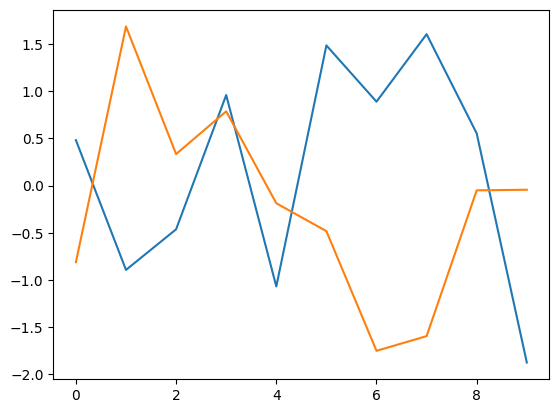

In [265]:
x = np.random.randn(1, 10, 1)
# x[0,0,0] = 0
# # x[0,4,0] = 10.
# x[0,-1,0] = 2
y = np.random.randn(1, 10, 1)
# y[0,0,0] = 0
# y[0,-1,0] = -2
plt.plot(x.flatten())
plt.plot(y.flatten())
# x.flatten(), y.flatten()
kernel(x,x), kernel(y,y), kernel(x,y)

In [266]:
x = np.arange(10).reshape((1, 10, 1))
x2 = x.copy()
y = -np.arange(10).reshape((1, 10, 1))
# x2[0,4,0]=20.
x2[0,1:-1,0]=-10.
# x2[0,-1,0] = 100.

t = np.arange(10).reshape((1, 10, 1))
x_t = np.concatenate([t, x], axis=-1)
x2_t = np.concatenate([t, x2], axis=-1)
y_t = np.concatenate([t, y], axis=-1)
print(x.flatten())
print(x2.flatten())
print(y.flatten())
print(x_t.shape, x2_t.shape, y_t.shape)

[0 1 2 3 4 5 6 7 8 9]
[  0 -10 -10 -10 -10 -10 -10 -10 -10   9]
[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
(1, 10, 2) (1, 10, 2) (1, 10, 2)


In [267]:
print(sig.sig(x, n_levels))
print(sig.sig(x2, n_levels))

[[   9.      40.5    121.5    273.375  492.075  738.112  949.002 1067.627
  1067.627  960.864  786.162  589.621  408.199  262.414  157.448   88.565
    46.887   23.444   11.105    4.997]]
[[   9.      40.5    121.5    273.375  492.075  738.113  949.002 1067.627
  1067.627  960.864  786.162  589.621  408.199  262.414  157.448   88.565
    46.887   23.444   11.105    4.997]]


In [268]:
kernel(x,x), kernel(y,y), kernel(x,y)

(array([[327.605]]), array([[327.605]]), array([[2.207]]))

In [269]:
kernel(x2,x2), kernel(y,y), kernel(x2,y)

(array([[8.2]]), array([[327.605]]), array([[2.042]]))

In [270]:
kernel(x_t,x_t), kernel(y_t,y_t), kernel(x_t,y_t)

(array([[414.403]]), array([[414.403]]), array([[2.28]]))

In [271]:
kernel(x2_t,x2_t), kernel(y_t,y_t), kernel(x2_t,y_t)

(array([[424.472]]), array([[414.403]]), array([[2.28]]))

## Using example from A Primer for the Signature Method in ML

In [2]:
import math
import numpy as np
import sigkernel as ksig

In [4]:
x = np.array([[1,3,5,8], [1,4,2,6]]).T[np.newaxis, ...]
t = np.arange(4)
x, x.shape

(array([[[1, 1],
         [3, 4],
         [5, 2],
         [8, 6]]]),
 (1, 4, 2))

In [7]:
sig = np.array([1., 7. ,  5. , 24.5, 19. , 16. , 12.5])
np.dot(sig, sig)

1448.5

In [8]:
n_levels = 2
static_kernel = ksig.static.kernels.LinearKernel()
kernel = ksig.kernels.SignatureKernel(n_levels=n_levels, order=n_levels, static_kernel=static_kernel, difference=True)

In [9]:
kernel(x,x)

array([[1448.5]])

# MMD distribution

In [6]:
from scipy.stats import norm, dirichlet
import numpy as np
import matplotlib.pyplot as plt

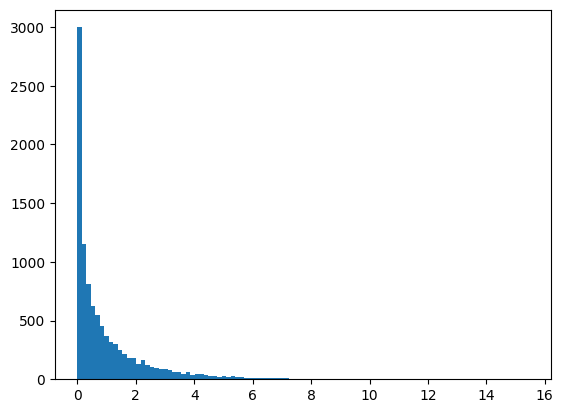

In [12]:
n = 10000 # number of samples
m = 1 # number of variables to sum in each sample
Z = norm.rvs(size=(n,m))
Z_sq = Z**2
weights = dirichlet.rvs(np.ones(m), size=n)
Z_sq_sum = np.sum(Z_sq * weights, axis=1)
weights.shape, Z_sq.shape, Z_sq_sum.shape
plt.hist(Z_sq_sum, bins=100);

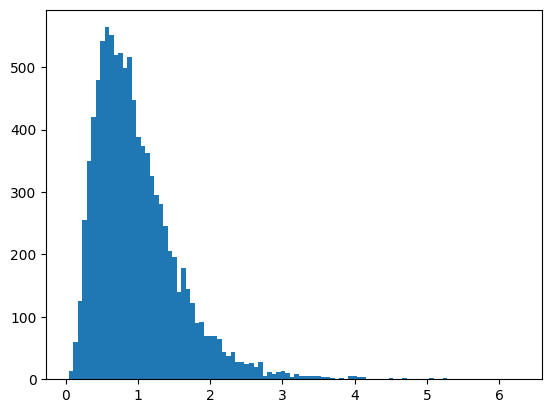

In [14]:
n = 10000 # number of samples
m = 10 # number of variables to sum in each sample
Z = norm.rvs(size=(n,m))
Z_sq = Z**2
weights = dirichlet.rvs(np.ones(m), size=n)
Z_sq_sum = np.sum(Z_sq * weights, axis=1)
weights.shape, Z_sq.shape, Z_sq_sum.shape
plt.hist(Z_sq_sum, bins=100);

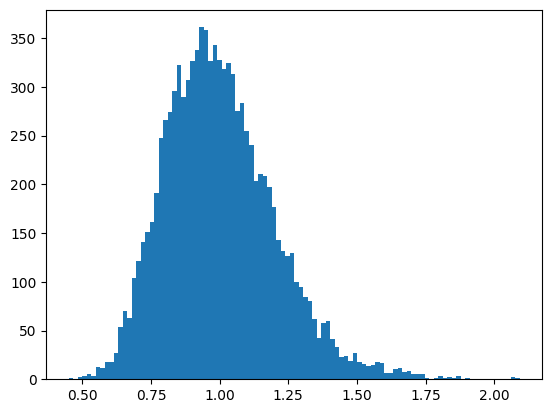

In [15]:
n = 10000 # number of samples
m = 100 # number of variables to sum in each sample
Z = norm.rvs(size=(n,m))
Z_sq = Z**2
weights = dirichlet.rvs(np.ones(m), size=n)
Z_sq_sum = np.sum(Z_sq * weights, axis=1)
weights.shape, Z_sq.shape, Z_sq_sum.shape
plt.hist(Z_sq_sum, bins=100);

# Signature cross terms

In [1]:
import math
import numpy as np
import sigkernel as ksig
import iisignature as sig

from utils.transformations import *

In [2]:
X_seed=1
Y_seed=8
initial_value = 1.
scaling_factor = 100.

num_permutations = 10000
n_levels = 4
n_samples = 100
sample_len = 60
dt = 1 / 252
percentile = 0.95
difference = True # parameter for the signature kernel which should be True for correct signature computation

# transformations which are done in sequence as below
cumsum = False # whether to transform the data to cumulative sum series
leadlag = False # whether to transform the data to lead-lag series
time_dimension = True # whether to add time dimension to the data

In [3]:
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len, seed=X_seed).astype(np.float32) * initial_value
Y = ksig.tests.gen_Heston_path(mu=0.1, v0=0.04, kappa=0.1, theta=0.04, sigma=0.2, rho=-0.5,
                               dt=dt, n_paths=n_samples, seq_len=sample_len, seed=X_seed).astype(np.float32) * initial_value

In [4]:
log_X = np.log(X)
log_Y = np.log(Y)
scaled_X = X * scaling_factor
scaled_Y = Y * scaling_factor

if cumsum:
    X = X.cumsum(axis=1)
    Y = Y.cumsum(axis=1)
    log_X = log_X.cumsum(axis=1)
    log_Y = log_Y.cumsum(axis=1)

if leadlag:
    X = lead_lag_transformation(X)
    Y = lead_lag_transformation(Y)
    log_X = lead_lag_transformation(log_X)
    log_Y = lead_lag_transformation(log_Y)

if time_dimension:
    t = np.linspace(0, dt * sample_len, sample_len).reshape(1,-1, 1).repeat(n_samples, axis=0)
    X = np.concatenate([t, X], axis=-1)
    Y = np.concatenate([t, Y], axis=-1)
    log_X = np.concatenate([t, log_X], axis=-1)
    log_Y = np.concatenate([t, log_Y], axis=-1)

X.shape, Y.shape, log_X.shape, log_Y.shape

((100, 60, 2), (100, 60, 2), (100, 60, 2), (100, 60, 2))

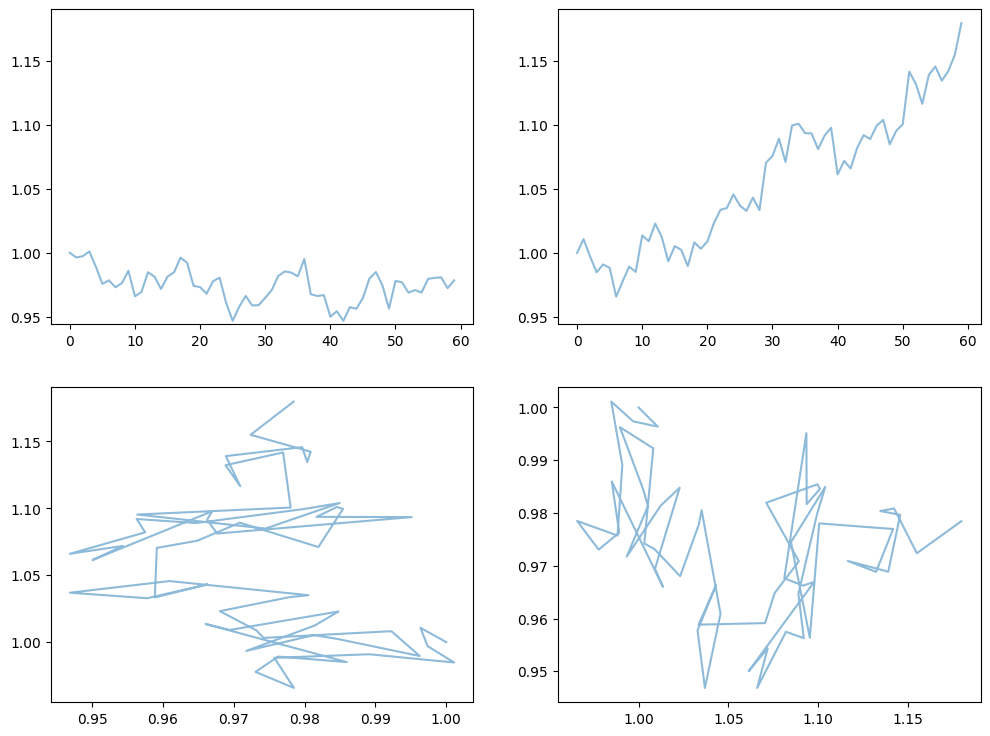

In [5]:
i = 1
x = X[i]
y = Y[i]
log_x = log_X[i]
log_y = log_Y[i]
scaled_x = scaled_X[i]
scaled_y = scaled_Y[i]

fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0,0].plot(x[:,-1].squeeze().T, alpha=0.5);
ax[0,1].plot(y[:,-1].squeeze().T, alpha=0.5);

ylim = min(ax[0,0].get_ylim()[0], ax[0,1].get_ylim()[0]), max(ax[0,0].get_ylim()[1], ax[0,1].get_ylim()[1]);
ax[0,0].set_ylim(ylim)
ax[0,1].set_ylim(ylim)

ax[1,0].plot(x[:,-1].squeeze().T, y[:,-1].squeeze().T,alpha=0.5);
ax[1,1].plot(y[:,-1].squeeze().T, x[:,-1].squeeze().T,alpha=0.5);

In [6]:
print(f'sx2: {sig.sig(x, 1)[1]}, sy2: {sig.sig(y, 1)[1]}')
print(f'sx1 x sx2: {np.product(sig.sig(x, 1))}, sy1 x sy2: {np.product(sig.sig(y, 1))}')

sx2: -0.02154618501663208, sy2: 0.17975783348083496
sx1 x sx2: -0.005130044051579067, sy1 x sy2: 0.04279948416210356


In [7]:
print(0.5*sig.sig(x, 1)**2, 0.5*sig.sig(y, 1)**2)
print(f'sx12, sx21: {sig.sig(x, 2)[3:5]}, sy12, sy21: {sig.sig(y, 2)[3:5]}')
print(f'sx12 + sx21: {np.sum(sig.sig(x, 2)[3:5])}, sy12 + sy21: {np.sum(sig.sig(y, 2)[3:5])}')

[0.02834467 0.00023212] [0.02834467 0.01615644]
sx12, sx21: [ 0.00099693 -0.00612698], sy12, sy21: [0.02928068 0.01351881]
sx12 + sx21: -0.005130044051579067, sy12 + sy21: 0.04279948416210355


In [8]:
print((sig.sig(x, 1)**3)/6, sig.sig(y, 1)**3/6)
sig.sig(x, 3)[7:-1], sig.sig(y, 3)[7:-1]

[ 2.24957708e-03 -1.66709329e-06] [0.00224958 0.00096808]


(array([ 1.95437674e-04, -1.53510285e-04,  1.95956033e-05, -6.52646919e-04,
        -6.06713151e-05,  9.63421510e-05]),
 array([0.00267025, 0.0016311 , 0.00212626, 0.00079383, 0.00101091,
        0.0007096 ]))

## Time dimension in kernel calculations

In [9]:
static_kernel = ksig.static.kernels.LinearKernel()
# static_kernel = ksig.static.kernels.RBFKernel(lengthscale=0.1)
# static_kernel = ksig.static.kernels.PolynomialKernel(degree=1)
sig_kernel = ksig.kernels.SignatureKernel(n_levels=n_levels, order=n_levels, static_kernel=static_kernel, difference=difference)

In [10]:
K_XX = sig_kernel(X, X)
K_YY = sig_kernel(Y, Y)
K_XY = sig_kernel(X, Y)
scaled_K_XX = sig_kernel(scaled_X, scaled_X)
scaled_K_YY = sig_kernel(scaled_Y, scaled_Y)
scaled_K_XY = sig_kernel(scaled_X, scaled_Y)
log_K_XX = sig_kernel(log_X, log_X)
log_K_YY = sig_kernel(log_Y, log_Y)
log_K_XY = sig_kernel(log_X, log_Y)

In [11]:
K_XX.shape, K_YY.shape, K_XY.shape

((100, 100), (100, 100), (100, 100))

In [12]:
sig_x = sig.sig(x, n_levels)
sig_y = sig.sig(y, n_levels)
sig_x, sig_y

(array([ 2.38095238e-01, -2.15461850e-02,  2.83446712e-02,  9.96933265e-04,
        -6.12697732e-03,  2.32119044e-04,  2.24957708e-03,  1.95437674e-04,
        -1.53510285e-04,  1.95956033e-05, -6.52646919e-04, -6.06713151e-05,
         9.63421510e-05, -1.66709329e-06,  1.33903398e-04,  1.59882667e-05,
        -1.43202051e-06,  2.32460839e-06, -1.68430135e-05, -4.15227882e-06,
         4.16868186e-06,  8.02144659e-08, -4.61830367e-05, -4.70787426e-06,
        -8.77523888e-07, -6.62853891e-07,  9.82372470e-06,  1.31647158e-06,
        -1.13075913e-06,  8.97987513e-09]),
 array([2.38095238e-01, 1.79757833e-01, 2.83446712e-02, 2.92806781e-02,
        1.35188061e-02, 1.61564393e-02, 2.24957708e-03, 2.67024535e-03,
        1.63109932e-03, 2.12625927e-03, 7.93832016e-04, 1.01091271e-03,
        7.09599293e-04, 9.68082178e-04, 1.33903398e-04, 1.77714507e-04,
        1.02629180e-04, 1.55347722e-04, 9.15493108e-05, 1.17983611e-04,
        7.75731537e-05, 1.12973109e-04, 3.24861040e-05, 5.131846

In [13]:
K_XX[i,i], K_YY[i,i], K_XY[i,i]

(1.0580011709073565, 1.0911293907083024, 1.053574657876309)

In [14]:
np.dot(sig_x, sig_x), np.dot(sig_y, sig_y), np.dot(sig_x, sig_y)

(0.05800117090735651, 0.0911293907083025, 0.05357465787630893)

In [15]:
scaled_sig_x = sig.sig(scaled_x, n_levels)
scaled_sig_y = sig.sig(scaled_y, n_levels)
scaled_sig_x, scaled_sig_y

(array([-2.15461731,  2.32118788, -1.66709052,  0.89798553]),
 array([  17.9757843 ,  161.56441063,  968.08233212, 4350.50979713]))

In [16]:
scaled_K_XX[i,i], scaled_K_YY[i,i], scaled_K_XY[i,i]

(13.95694, 19891544.0, 2621.4458)

In [17]:
np.dot(scaled_sig_x, scaled_sig_x), np.dot(scaled_sig_y, scaled_sig_y), np.dot(scaled_sig_x, scaled_sig_y)

(13.615857725819133, 19890545.084253345, 2629.1043578712533)

In [18]:
log_sig_x = sig.sig(log_x, n_levels)
log_sig_y = sig.sig(log_y, n_levels)
log_sig_x, log_sig_y

(array([ 2.38095238e-01, -2.17816941e-02,  2.83446712e-02,  1.04164272e-03,
        -6.22776037e-03,  2.37221100e-04,  2.24957708e-03,  2.02459580e-04,
        -1.56908988e-04,  2.07453874e-05, -6.62945550e-04, -6.41795180e-05,
         9.99153448e-05, -1.72235915e-06,  1.33903398e-04,  1.65443104e-05,
        -1.42826941e-06,  2.47791664e-06, -1.72513721e-05, -4.41332350e-06,
         4.39686819e-06,  9.07570557e-08, -4.68642688e-05, -4.95242241e-06,
        -9.62669281e-07, -7.24140851e-07,  1.01775844e-05,  1.42311017e-06,
        -1.19981188e-06,  9.37897504e-09]),
 array([2.38095238e-01, 1.65309206e-01, 2.83446712e-02, 2.65052178e-02,
        1.28541168e-02, 1.36635667e-02, 2.24957708e-03, 2.38480512e-03,
        1.54115591e-03, 1.76576653e-03, 7.59674049e-04, 8.50023448e-04,
        6.37440197e-04, 7.52904455e-04, 1.33903398e-04, 1.57392096e-04,
        9.56344545e-05, 1.25934298e-04, 8.78364871e-05, 9.93946914e-05,
        6.91573158e-05, 8.66183510e-05, 3.10127621e-05, 4.296695

In [19]:
log_K_XX[i,i], log_K_YY[i,i], log_K_XY[i,i]

(1.0580127323988928, 1.0858929637536217, 1.0538477063003096)

In [20]:
np.dot(log_sig_x, log_sig_x), np.dot(log_sig_y, log_sig_y), np.dot(log_sig_x, log_sig_y)

(0.05801273239889265, 0.08589296375362174, 0.053847706300309786)

# Cupy pad

In [2]:
import numpy as np
import cupy as cp

In [8]:
array = np.ones((2,3,4,5))
print(array.shape)
array

(2, 3, 4, 5)


array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]])

In [26]:
array = cp.asarray(array)
pads = ((0, 0), (1, 2), (0, 0), (1, 0))
array = cp.pad(array, pads, mode='constant')
array.shape

(2, 7, 4, 7)

In [27]:
array

array([[[[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.]],

        [[0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.]],

        [[0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0.],
         [0.,

In [21]:
ndim=4
axis = [1,3]
pads = tuple((1, 0) if ax in axis else (0, 0) for ax in range(ndim))
pads

((0, 0), (1, 0), (0, 0), (1, 0))

In [28]:
tuple(x for ax in reversed(range(ndim)) for x in ((1, 0) if ax in axis else (0, 0)))

(1, 0, 0, 0, 1, 0, 0, 0)